The **Mechanism of Action** prediction problem is provided by  *Laboratory for Innovation Science at Harvard (LISH)*, and the NIH Common Funds *Library of Integrated Network-Based Cellular Signatures (LINCS)*. </br></br>
The *goal* of this project is to make drug development more advance and fast by predicting the MoA of drug quickly. Generally researcher do is that they treat sample cell with a drug and finds similarity in *genomic databases* which costs lots of time and money and makes this process very slow. So, the goal of this project is to speed-up this process and make it more efficient. </br></br>
**What is Mechanism of Action (MoA)?**</br>
Now a days, drug development has become target based by understanding of the underlying biological mechanism of a disease. So, to describe biological activity of a drug or molecule scientists assigned a label called *Mechanism of Action*.</br></br>
**How the Mechanism of Action of a new drug is being determined?**</br>
One approach is to treat a sample of human cells with the drug and then analyze the cellular responses with algorithms that search for similarity to known patterns in large genomic databases, such as libraries of gene expression or cell viability patterns of drugs with known MoAs.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
#from tqdm import tqdm                                              
from tqdm.notebook import tqdm
import pickle

In [2]:
'''
downloading dataset using curlwget. curlwget is an extension in chrome browser,
If a dataset is very large which we don't want to download in our system, then using curlwget
we can access them.
To use curlwget use following steps:
1. add curlwget extension to chrome
2. now, go to the url from where you want to download the dataset
3. click on download and immediately cancel the download
4. click on curlwget extension from top-right corner
5. copy the text and pase in notebook followed by exclamation(!) mark
'''
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19988/1651354/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1617244648&Signature=OG%2FlB4WxV8Fht%2FLriUNvZuEJWUj5jAhxMGjKvxxNSP3daZkZaKzYVZtYnGu3WR96c1CSf8aRgBpo3cd9UIVRgPL3mhelLtCD8qOO85Ck2et0VgtSL7nVstJYkhBcQ14R1VhhsbsNVo0uFdcuBo5ae8BAxGljnZZ47L0fILsYgYRObYbevV9FtN54xRScOQnXR%2BguiZp0In1gwuplFigPX1t%2FVv2m7Ep1PhbNJ8XVXYgdvWReUFQBz%2B78AJOyJFCaXLWLA7fn2ZRUlsS5TmTpOEt8igl84cL88yhCzd4cnI6cmzfZBwf3jWvTTra65zHUMi%2FijtYkNPdNeZMJP%2BRCaw%3D%3D&response-content-disposition=attachment%3B+filename%3Dlish-moa.zip" -c -O 'lish-moa.zip'

--2021-03-30 16:04:50--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/19988/1651354/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1617244648&Signature=OG%2FlB4WxV8Fht%2FLriUNvZuEJWUj5jAhxMGjKvxxNSP3daZkZaKzYVZtYnGu3WR96c1CSf8aRgBpo3cd9UIVRgPL3mhelLtCD8qOO85Ck2et0VgtSL7nVstJYkhBcQ14R1VhhsbsNVo0uFdcuBo5ae8BAxGljnZZ47L0fILsYgYRObYbevV9FtN54xRScOQnXR%2BguiZp0In1gwuplFigPX1t%2FVv2m7Ep1PhbNJ8XVXYgdvWReUFQBz%2B78AJOyJFCaXLWLA7fn2ZRUlsS5TmTpOEt8igl84cL88yhCzd4cnI6cmzfZBwf3jWvTTra65zHUMi%2FijtYkNPdNeZMJP%2BRCaw%3D%3D&response-content-disposition=attachment%3B+filename%3Dlish-moa.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67874518 (65M) [application/zip]
Saving to: ‘lish-moa.zip’

lish-moa.zip        100%[===

In [3]:
#unzipping the downloaded zip file of dataset
!unzip 'lish-moa.zip'

Archive:  lish-moa.zip
  inflating: sample_submission.csv   
  inflating: test_features.csv       
  inflating: train_drug.csv          
  inflating: train_features.csv      
  inflating: train_targets_nonscored.csv  
  inflating: train_targets_scored.csv  


In [4]:
#Reading datasets
df = pd.read_csv('train_features.csv')
tts = pd.read_csv('train_targets_scored.csv')
ttns = pd.read_csv('train_targets_nonscored.csv')
td = pd.read_csv('train_drug.csv')
te_df = pd.read_csv('test_features.csv')
sub = pd.read_csv('sample_submission.csv')

In [15]:
pickle.dump(tts.columns[1:],open('target_columns.pkl','wb'))

In [17]:
(pickle.load(open('target_columns.pkl','rb')))

Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=206)

In [3]:
df.shape

(23814, 876)

In [4]:
df.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In the datast we have 3 categorical variable cp_type, cp_time and cp_dose so let's visualize their histogram to get understanding about number of unique elements present in these three columns.

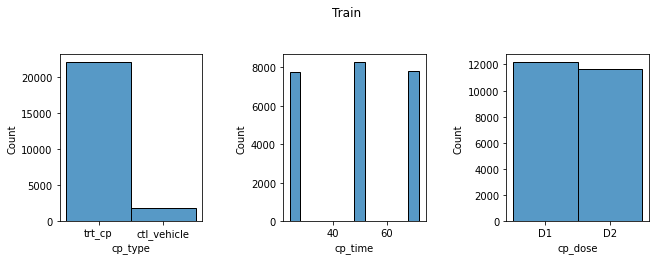

In [5]:
fig,axes=plt.subplots(1,3, figsize=(10,4))
plt.tight_layout(pad=5)
plt.suptitle('Train')
sns.histplot(df['cp_type'],binwidth=4,ax=axes[0])
sns.histplot(df['cp_time'], binwidth=4,ax=axes[1])
sns.histplot(df['cp_dose'],binwidth=4,ax=axes[2])
plt.show()

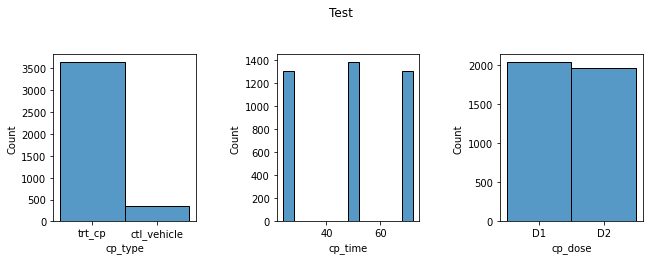

In [6]:
fig,axes=plt.subplots(1,3, figsize=(10,4))
plt.tight_layout(pad=5)
plt.suptitle('Test')
sns.histplot(te_df['cp_type'],binwidth=4,ax=axes[0])
sns.histplot(te_df['cp_time'], binwidth=4,ax=axes[1])
sns.histplot(te_df['cp_dose'],binwidth=4,ax=axes[2])
plt.show()

**In both train and test datasets:**<br>
cp_type column is imbalanced, trt_cp is dominating over ctl_vehicle.</br> cp_time column is balanced.</br> cp_dose column is also balanced.



**Here cp_type and cp_dose is nominal data and cp_dose is ordinal data so accordingly we will encode these categorical data.**

In [7]:
#embedding cp_type, cp_time and cp_dose categorical columns of train dataset
df['cp_type'] = df['cp_type'].map({'trt_cp':0, 'ctl_vehicle':1})
df['cp_time'] = df['cp_time'].map({24:0, 48:1, 72:2})
df['cp_dose'] = df['cp_dose'].map({'D1':0, 'D2':1})

In [8]:
#embedding cp_type, cp_time and cp_dose categorical columns of test dataset
te_df['cp_type'] = te_df['cp_type'].map({'trt_cp':0, 'ctl_vehicle':1})
te_df['cp_time'] = te_df['cp_time'].map({24:0, 48:1, 72:2})
te_df['cp_dose'] = te_df['cp_dose'].map({'D1':0, 'D2':1})

In [9]:
#checking for duplicate rowsin training dataset
print('Number of duplicate rows in train dataset :',df.duplicated().sum())
print('Number of duplicate sig_id of train dataset :',df['sig_id'].duplicated().sum())
print('Number of duplicate rows in train dataset except sig_id column:',df.drop('sig_id', axis=1).duplicated().sum())

Number of duplicate rows in train dataset : 0
Number of duplicate sig_id of train dataset : 0
Number of duplicate rows in train dataset except sig_id column: 0


**There is no any duplicate rows in train dataset**

In [10]:
#Checking for null values in train dataset
print('Number of null values in train dataset :',df.isnull().any().sum())

Number of null values in train dataset : 0


In [11]:
#Seperating gene and cell columns
gene_cols = [c for c in df.columns if c.startswith('g-')]
cell_cols = [c for c in df.columns if c.startswith('c-')]

In [12]:
print('Number of gene expression columns :',len(gene_cols))
print('Number of cell viability columns :',len(cell_cols))

Number of gene expression columns : 772
Number of cell viability columns : 100


In [13]:
df[cell_cols].describe()

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.355156,-0.455359,-0.480542,-0.377666,-0.493552,-0.446037,-0.574855,-0.266293,-0.451307,-0.458664,-0.486027,-0.473410,-0.508091,-0.510905,-0.306528,-0.452293,-0.337267,-0.473728,-0.619461,-0.330389,-0.454165,-0.496059,-0.383134,-0.295655,-0.443384,-0.449683,-0.597730,-0.431899,-0.501831,-0.288958,-0.385486,-0.434420,-0.322990,-0.545691,-0.461527,-0.350457,-0.477049,-0.209301,-0.598003,-0.397430,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,1.752565,2.004962,2.039346,1.554583,2.091888,1.893484,2.234152,1.465313,1.948829,1.646122,2.066695,2.058766,2.140051,2.170919,1.575507,1.974010,1.594663,2.079550,2.294899,1.641563,2.001374,2.023053,1.690235,1.536784,1.967079,1.899095,2.268931,1.916467,1.904629,1.521773,1.741182,1.988458,1.772399,2.201552,1.974772,1.751440,1.965178,1.287766,2.297375,1.838205,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.910000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,-0.549300,-0.538425,-0.550375,-0.601975,-0.559975,-0.578775,-0.571250,-0.524275,-0.551100,-0.654675,-0.564000,-0.546475,-0.555500,

In [14]:
df[gene_cols].describe()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,g-732,g-733,g-734,g-735,g-736,g-737,g-738,g-739,g-740,g-741,g-742,g-743,g-744,g-745,g-746,g-747,g-748,g-749,g-750,g-751,g-752,g-753,g-754,g-755,g-756,g-757,g-758,g-759,g-760,g-761,g-762,g-763,g-764,g-765,g-766,g-767,g-768,g-769,g-770,g-771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,0.132026,...,0.263569,-0.242638,0.110180,-0.039868,-0.064056,0.193629,0.004470,-0.187085,0.067186,0.006159,-0.201189,-0.243317,0.548903,0.247065,0.085950,0.090544,0.215525,-0.007705,0.236954,0.022785,0.103224,0.048402,0.109367,-0.103262,0.004129,0.066211,0.072773,-0.033051,-0.400643,-0.338978,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,0.990477,...,1.075809,1.309482,0.881283,0.917119,1.186966,1.212621,1.175611,1.182180,1.057292,0.996940,1.029370,1.378815,2.023791,1.639307,1.238753,0.961212,1.293783,0.966213,1.284074,1.015557,1.035968,1.048645,0.856080,1.175372,0.701031,0.996914,1.077310,1.579948,1.913468,1.701554,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,-4.223000,...,-5.504000,-10.000000,-3.790000,-10.000000,-10.000000,-10.000000,-7.920000,-10.000000,-9.462000,-6.634000,-10.000000,-10.000000,-2.912000,-9.833000,-7.227000,-5.561000,-8.393000,-5.790000,-4.915000,-10.000000,-10.000000,-7.918000,-5.255000,-10.000000,-6.264000,-10.000000,-5.505000,-10.000000,-10.000000,-10.000000,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950

**Plotting boxplots of 50 random gene columns to see the trend and check for outliers.**

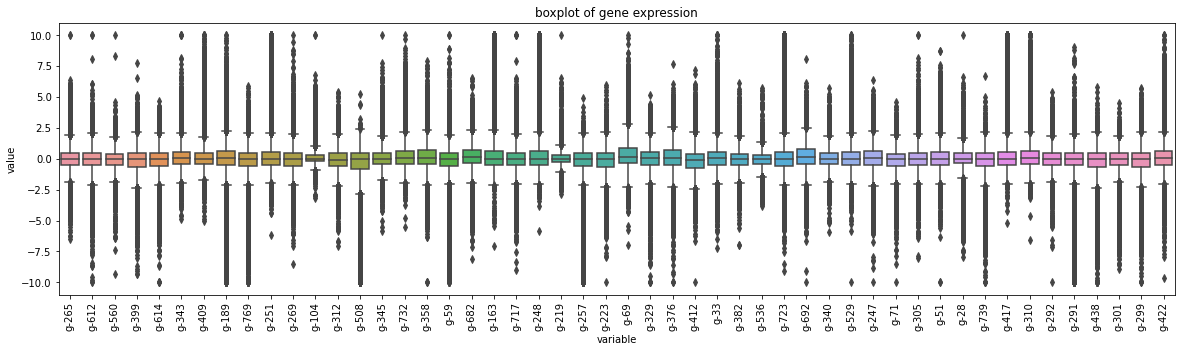

In [15]:
plt.figure(figsize=(20,5))
sns.boxplot(x="variable", y="value", data=pd.melt(df[gene_cols].iloc[:,random.sample(range(1,772),50)]))
plt.title('boxplot of gene expression')
plt.xticks(rotation=90)
plt.show()

From the boxplot we can see that value of each gene expression lies between 10 to -10. So, we can't classify them as outliers there is high variance in gene expression and we have to normalize it. 

In [16]:
'''
Since we have used 50 gene featured to visualize using boxplot, but
outliers can also be in other columns. So to check for outliers we are 
using threshold values. If value in a feature increses or decreases from
threshold value then the will be outliers.
'''

count=0
for i in (gene_cols):
  if (max(df[i])-np.mean(df[i])>11 or min(df[i])-np.mean(df[i])<-11):
    print(i, np.mean(df[i]), max(df[i]), min(df[i]))
    count+=1
if count==0:
  print('There is no any data point which is greater than 11 or less than -11')

There is no any data point which is greater than 11 or less than -11


**Plotting boxplots of 50 random cell columns to see the trend and check for outliers.**

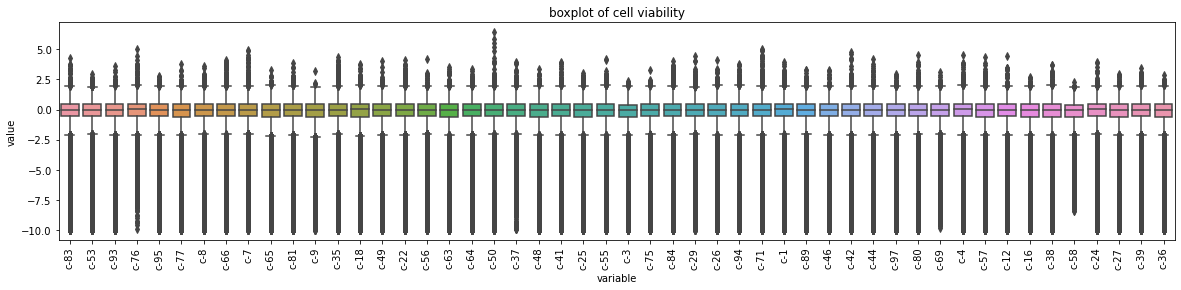

In [17]:
plt.figure(figsize=(20,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df[cell_cols].iloc[:,random.sample(range(1,100),50)]))
plt.title('boxplot of cell viability')
plt.xticks(rotation=90)
plt.show()

From the boxplot we can see that value of each cell viability lies between 10 to -10. So, we can't classify them as outliers,there is high variance in cell viability and we also have to normalize it.

In [18]:
'''
Since here also we have used 50 cell featured to visualize using boxplot, but
outliers can also be in other columns. So to check for outliers we are again
using threshold values. If value in a feature increses or decreases from
threshold value then the will be outliers.
'''

count=0
for i in (cell_cols):
  if (max(df[i])-np.mean(df[i])>7 or min(df[i])-np.mean(df[i])<-11):
    print(i, np.mean(df[i]), max(df[i]), min(df[i]))
    count+=1
if count==0:
  print('There is no any data point which is greater than 7 or less than -11')

There is no any data point which is greater than 7 or less than -11


**Visualizing correlation between gene columns**

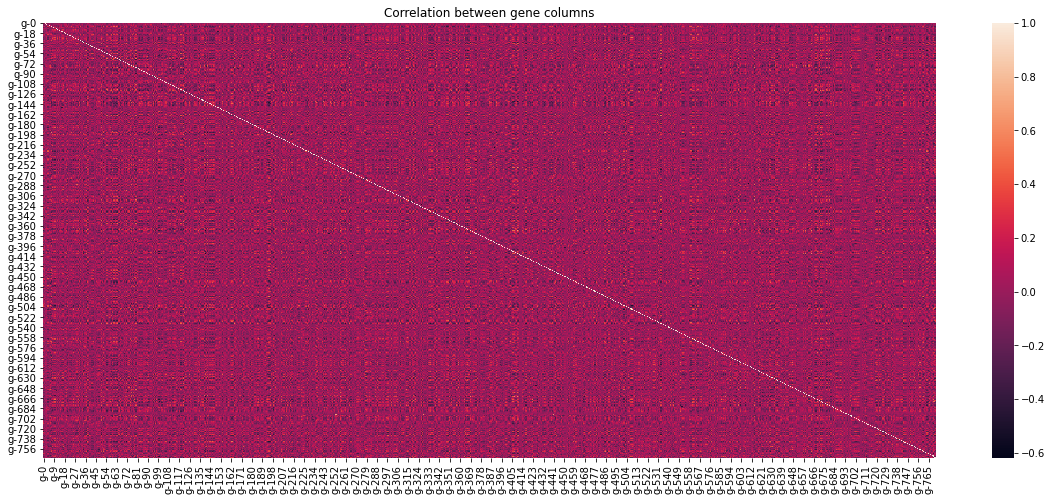

In [19]:
plt.figure(figsize=(20,8))
sns.heatmap(df[gene_cols].corr(method='spearman'))
plt.title('Correlation between gene columns')
plt.show()

From this heatmap we cannot clearly say that which columns are highly correlated, but we can see that there is no any very dark points in the heatmap and there are some light dots between g-250 to g-270 and 680 to 700, let's zoom into them.

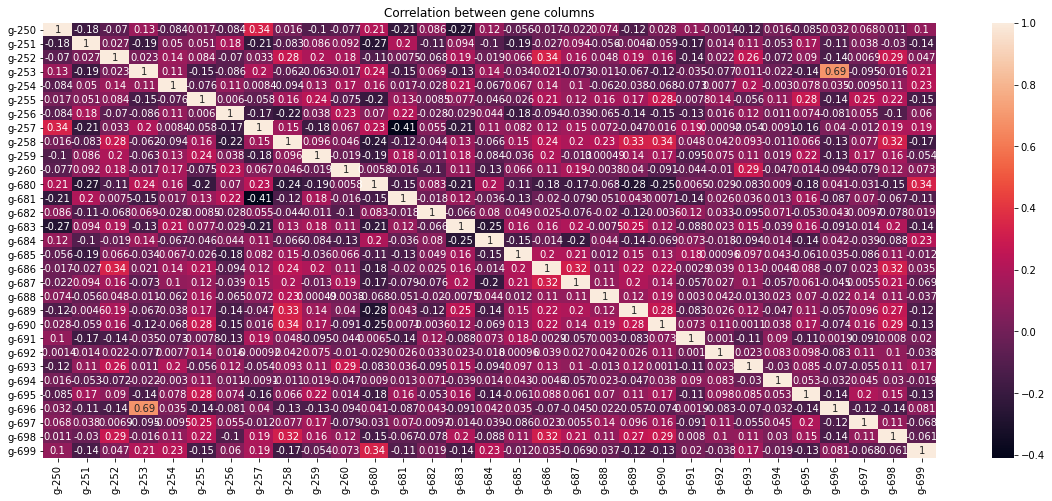

In [20]:
plt.figure(figsize=(20,8))
sns.heatmap(df[gene_cols[250:261]+gene_cols[680:700]].corr(method='spearman'), annot=True)
plt.title('Correlation between gene columns')
plt.show()

Hence there is correlation between g-253 and g-696. Since we have large number of gene feature so these small correlation between some features can be ignored.

**visualizing correlation between cell columns**

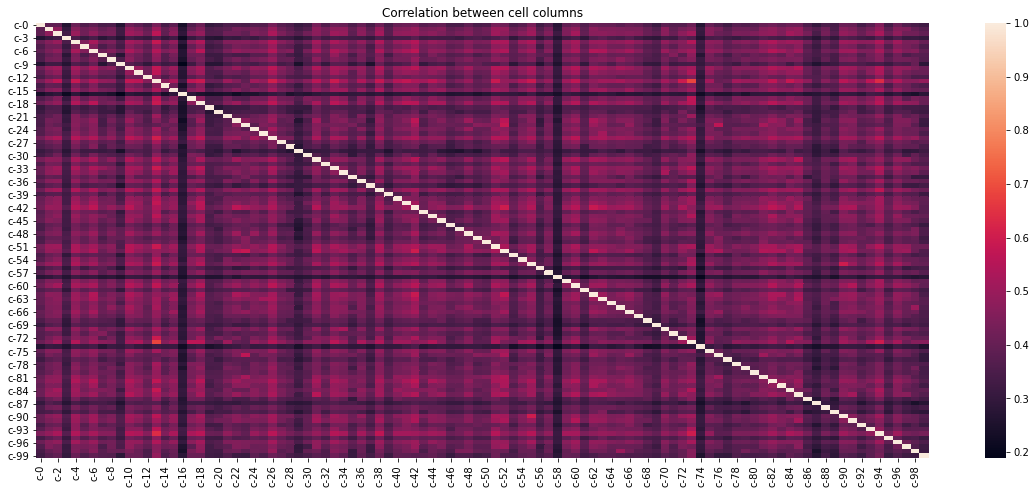

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(df[cell_cols].corr(method='spearman'))
plt.title('Correlation between cell columns')
plt.show()

Spearman Rank correlation rank lies between 1 and -1, so in cell columns there is no such high correlation. We can see some dark lines in heatmap such as c-16, c-85, c-74 but their correlation cannot less than 0.2. One interesting thing we can see in this heatmap is that no two columns are negatively correlated in cell columns.

**Plotting mean, standard deviation and skewness of gene columns**

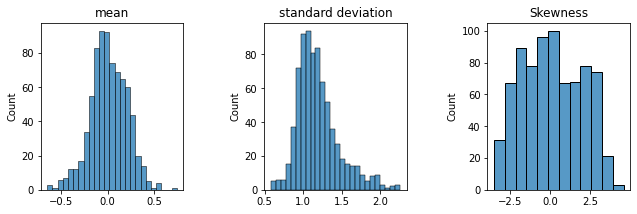

In [23]:
fig,axes=plt.subplots(1,3, figsize=(10,4))
plt.tight_layout(pad=5)
sns.histplot(np.mean(df[gene_cols]),ax=axes[0])
axes[0].set_title('mean')
sns.histplot(np.std(df[gene_cols]),ax=axes[1])
axes[1].set_title('standard deviation')
sns.histplot(df[gene_cols].skew(),ax=axes[2])
axes[2].set_title('Skewness')
plt.show()

Mean of gene columns lies between 1 and -1 and there are large number of columns whose means are near zero, standard deviation of the gene colums are from 0.5 to 2.5. Skewness is greater than 2.5 and less than -2.5, hence gene data is highly skewed. 

**Plotting mean, standard deviation and skewness of cell columns**

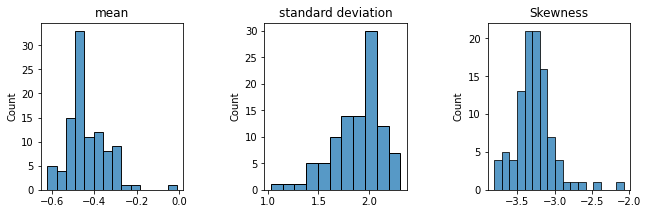

In [24]:
fig,axes=plt.subplots(1,3, figsize=(10,4))
plt.tight_layout(pad=5)
sns.histplot(np.mean(df[cell_cols]),ax=axes[0])
axes[0].set_title('mean')
sns.histplot(np.std(df[cell_cols]),ax=axes[1])
axes[1].set_title('standard deviation')
sns.histplot(df[cell_cols].skew(),ax=axes[2])
axes[2].set_title('Skewness')
plt.show()

Mean of gene columns lies between 0 and -0.6 and there are large number of columns whose means are near -0.5, standard deviation of the gene colums are from 1 to 2.5. Skewness is less than -2.0, hence gene data is highly left skewed.

**Checking train_drug dataset**

[]

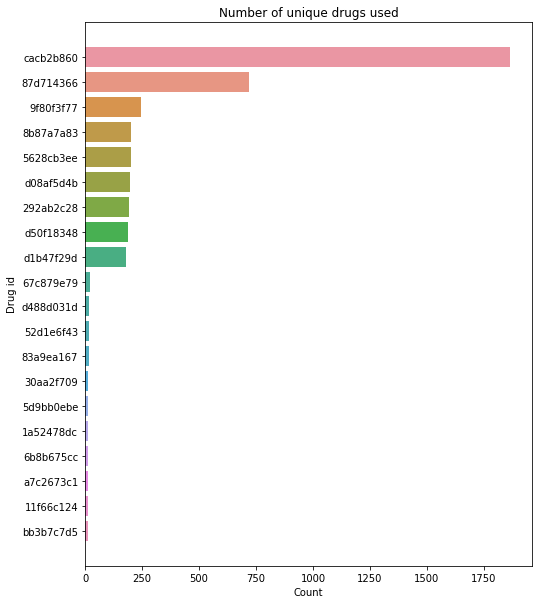

In [25]:
plt.figure(figsize=(8,10))
sns.countplot(y='drug_id', data=td, order=td['drug_id'].value_counts().index[:20])
plt.title('Number of unique drugs used')
plt.xlabel('Count')
plt.ylabel('Drug id')
plt.plot()

From above analysis we can say that top 9 drugs are mostly used to test on sample cells. 

**Checking for count of MoAs in each row of target scored dataset**

In [26]:
tts.sum(axis=1).value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
dtype: int64

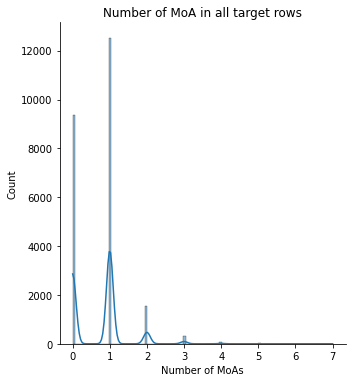

In [27]:
sns.displot(np.sum(tts.drop('sig_id', axis=1), axis=1), kde=True)
plt.xlabel('Number of MoAs')
plt.title('Number of MoA in all target rows')
plt.show()

From above graph we can see that maximum samples have either 0 or 1 MoAs and there are very less samples which have more than 1 MoAs.

In [28]:
#getting which MoA occurs most and which least
pd.DataFrame(np.sum(tts.drop('sig_id', axis=1), axis=0)).sort_values(by=[0], ascending=False)

,0
nfkb_inhibitor,832
proteasome_inhibitor,726
cyclooxygenase_inhibitor,435
dopamine_receptor_antagonist,424
serotonin_receptor_antagonist,404
...,...
elastase_inhibitor,6
steroid,6
atm_kinase_inhibitor,6
erbb2_inhibitor,1


nfkb_inhibitor, proteasome_inhibitor, cyclooxygenase_inhibitor, dopamine_receptor_antagonist, serotonin_receptor_antagonist occurs most whereas elastase_inhibitor, steroid, atm_kinase_inhibitor, erbb2_inhibitor, atp-sensitive_potassium_channel_antagonist	occurs least.

**Relation between cp_time, cp_dose and cp_type and number of MoAs**

In [29]:
num_moa_each_sample = np.sum(tts.drop('sig_id', axis=1), axis=1)

In [30]:
num_moa_each_sample.value_counts()

1    12532
0     9367
2     1538
3      303
4       55
5       13
7        6
dtype: int64

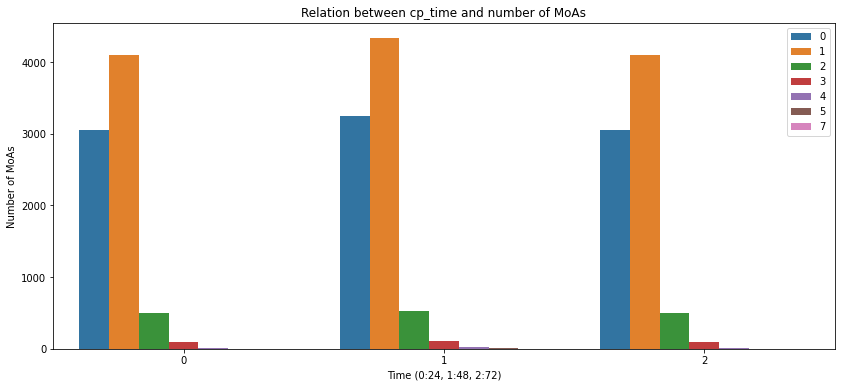

In [31]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['cp_time'], hue = num_moa_each_sample)
plt.title('Relation between cp_time and number of MoAs')
plt.xlabel('Time (0:24, 1:48, 2:72)')
plt.ylabel('Number of MoAs')
plt.show()

From above graph we can see that same distribution of MoAs are found in all the time.

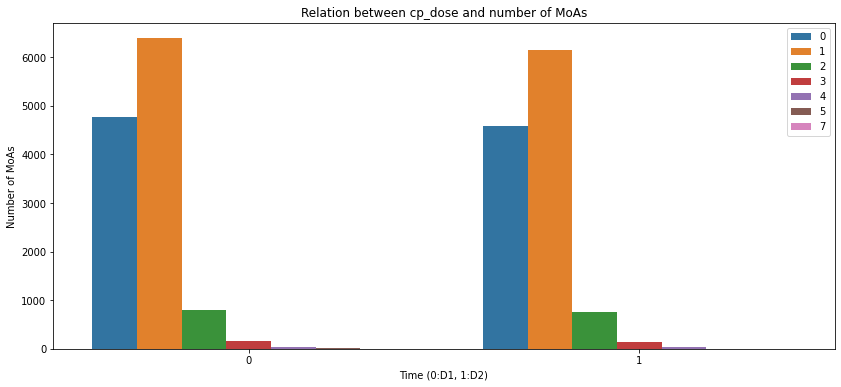

In [32]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['cp_dose'], hue = num_moa_each_sample)
plt.title('Relation between cp_dose and number of MoAs')
plt.xlabel('Time (0:D1, 1:D2)')
plt.ylabel('Number of MoAs')
plt.show()

From above graph we can see that same distribution of MoAs are found in all the type of doses.

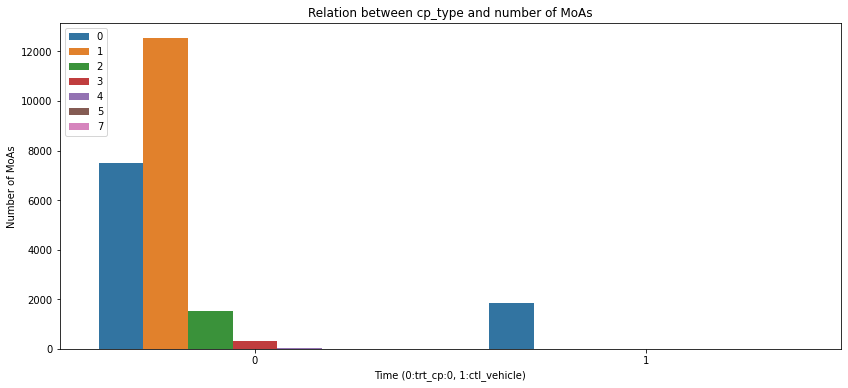

In [33]:
plt.figure(figsize=(14,6))
sns.countplot(x=df['cp_type'], hue = num_moa_each_sample)
plt.title('Relation between cp_type and number of MoAs')
plt.xlabel('Time (0:trt_cp:0, 1:ctl_vehicle)')
plt.ylabel('Number of MoAs')
plt.show()

As cp_type columns is highly imbalanced so here from above graph we can see that when ctl_vehicle vehicle mainly 0 MoA is found.

# **Feature Engineering**

In [34]:
#making copy of train_features dataset
df_cp = df.copy()

In [35]:
te_df_cp = te_df.copy()

In [36]:
#using QunatileTransformer to transform oue gene and cell columns
#QunatileTransformer method transforms the features to follow a uniform or a normal distribution.
from sklearn.preprocessing import QuantileTransformer

In [37]:
qt = QuantileTransformer(n_quantiles=100, random_state=0)
qt.fit(df_cp[gene_cols + cell_cols])

QuantileTransformer(copy=True, ignore_implicit_zeros=False, n_quantiles=100,
                    output_distribution='uniform', random_state=0,
                    subsample=100000)

In [39]:
#saving quantile transformer as pickle file
pickle.dump(qt, open('transform.pkl', 'wb'))

In [40]:
#loading quantile transformer pickle file
transformer = pickle.load(open('transform.pkl','rb'))

In [41]:
df_cp[gene_cols+cell_cols] = transformer.transform(df_cp[gene_cols + cell_cols])
te_df_cp[gene_cols+cell_cols] = transformer.transform(te_df[gene_cols + cell_cols])

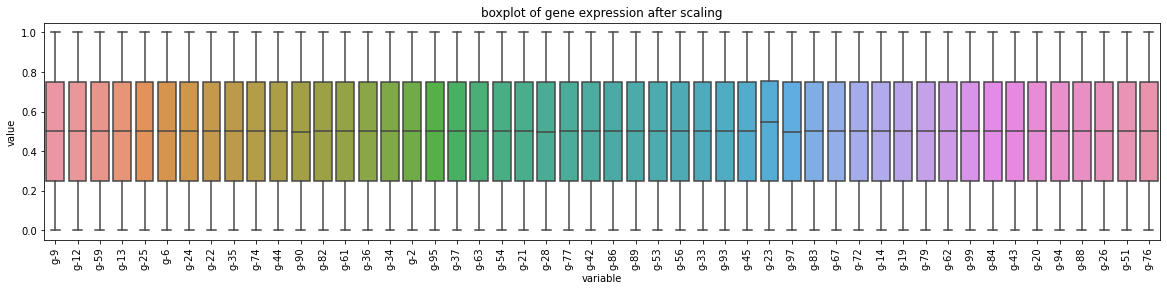

In [46]:
#plotting random 50 gene columns after transformation
plt.figure(figsize=(20,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_cp[gene_cols].iloc[:,random.sample(range(1,100),50)]))
plt.title('boxplot of gene expression after scaling')
plt.xticks(rotation=90)
plt.show()

From above boxplots we can see that variance of all the gene columns have reduced and they have become normally distributed.

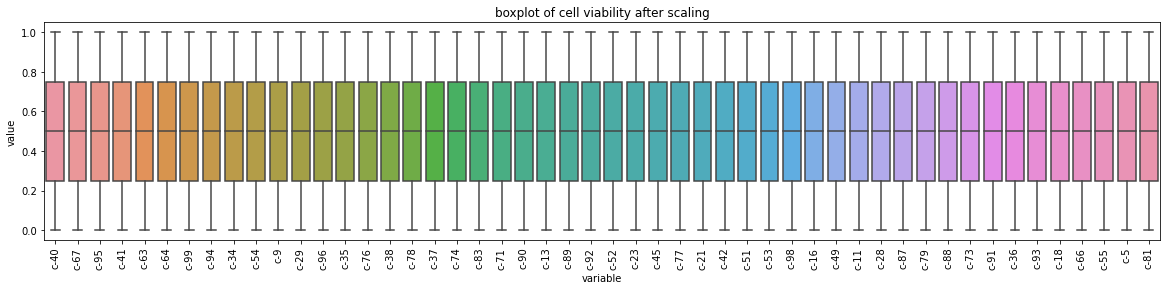

In [47]:
#plotting random 50 cell columns after transformation
plt.figure(figsize=(20,4))
sns.boxplot(x="variable", y="value", data=pd.melt(df_cp[cell_cols].iloc[:,random.sample(range(1,100),50)]))
plt.title('boxplot of cell viability after scaling')
plt.xticks(rotation=90)
plt.show()

From above boxplots we can see that variance of all the cell columns have reduced and they have become normally distributed.



### **Applying autoencoding for feature selection**

In [48]:
df_cp.drop('sig_id', axis=1, inplace=True)

In [49]:
te_df_cp.drop('sig_id', axis=1, inplace=True)

In [50]:
#Reference : https://machinelearningmastery.com/autoencoder-for-classification/
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

In [51]:
# AutoEncoder Model Preparation
n_inputs = df_cp.shape[1]
# define encoder
input_data_shape= Input(shape=(n_inputs,))
# encoder level
encoder= Dense(512, activation='relu')(input_data_shape)
encoder= Dense(128, activation='relu')(encoder)
encoder= Dense(64, activation='relu')(encoder)
encoder= Dense(32, activation='relu')(encoder)
# bottleneck
n_bottleneck = 50
bottleneck = Dense(n_bottleneck)(encoder)
# define decoder
decoder = Dense(32, activation='relu')(bottleneck)
decoder = Dense(64, activation='relu')(decoder)
decoder = Dense(128, activation='relu')(decoder)
decoder = Dense(512, activation='relu')(decoder)

In [52]:
# output layer
output = Dense(n_inputs, activation='linear')(decoder)
# define autoencoder model
model = Model(inputs=input_data_shape, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [53]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 875)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               448512    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 50)                1650      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1632  

In [54]:
# fit the autoencoder model to reconstruct input
history = model.fit(df_cp, df_cp, epochs=50, batch_size=16, verbose=2, validation_data=(te_df_cp,te_df_cp))

Epoch 1/50
1489/1489 - 17s - loss: 0.0660 - val_loss: 0.0586
Epoch 2/50
1489/1489 - 15s - loss: 0.0572 - val_loss: 0.0546
Epoch 3/50
1489/1489 - 15s - loss: 0.0543 - val_loss: 0.0533
Epoch 4/50
1489/1489 - 15s - loss: 0.0528 - val_loss: 0.0516
Epoch 5/50
1489/1489 - 15s - loss: 0.0518 - val_loss: 0.0511
Epoch 6/50
1489/1489 - 18s - loss: 0.0510 - val_loss: 0.0506
Epoch 7/50
1489/1489 - 15s - loss: 0.0504 - val_loss: 0.0506
Epoch 8/50
1489/1489 - 15s - loss: 0.0499 - val_loss: 0.0498
Epoch 9/50
1489/1489 - 15s - loss: 0.0495 - val_loss: 0.0496
Epoch 10/50
1489/1489 - 16s - loss: 0.0492 - val_loss: 0.0491
Epoch 11/50
1489/1489 - 15s - loss: 0.0490 - val_loss: 0.0492
Epoch 12/50
1489/1489 - 16s - loss: 0.0488 - val_loss: 0.0488
Epoch 13/50
1489/1489 - 16s - loss: 0.0486 - val_loss: 0.0487
Epoch 14/50
1489/1489 - 16s - loss: 0.0485 - val_loss: 0.0486
Epoch 15/50
1489/1489 - 15s - loss: 0.0483 - val_loss: 0.0485
Epoch 16/50
1489/1489 - 16s - loss: 0.0482 - val_loss: 0.0487
Epoch 17/50
1489/

In [56]:
# define an encoder model (without the decoder)
encoder = Model(inputs=input_data_shape, outputs=bottleneck)
# save the encoder to file
encoder.save('encoder.h5')

In [57]:
# loading the encoder model
encoder = load_model('encoder.h5')

In [58]:
# encode the train data
X_train_encode = encoder.predict(df_cp)
# encode the test data
X_test_encode = encoder.predict(te_df_cp)

### **Model Creation**

In [60]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


### Applying 2-step process for model creation<br>
Step 1: Predict whether any MoA is active or not.<br>
Step 2: If any MoA is active then find which MoA is active

**Step 1**

In [61]:
X_1 = pd.concat([df_cp, pd.DataFrame(X_train_encode)], axis=1)    #concatenating original train data with data left after autoencoding
y_1 = num_moa_each_sample.map({1:1,2:1,3:1,4:1,5:1,7:1,0:0})    #if MoA is present then map it to 1 elso 0

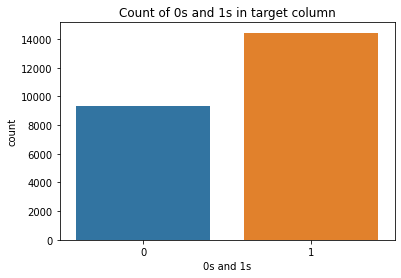

In [62]:
#plotting count of 0s and 1s in target column
sns.countplot(y_1)
plt.title('Count of 0s and 1s in target column')
plt.xlabel('0s and 1s')
plt.ylabel('count')
plt.show()

From above graph we can say that dataset is nearly balanced.

In [63]:
#splitting the dataset
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size=0.1, random_state=0)

*Logistic Regression*

In [64]:
#Applying KFold cross validation 
kf = KFold(n_splits=5, shuffle=True, random_state=0)
#training model for each fold and storing validation score
score_lr=[]
model_lr = SGDClassifier(loss='log')
for train_idx, test_idx in tqdm(kf.split(X_1,y_1)):
  X_train , X_val = X_1.iloc[train_idx], X_1.iloc[test_idx]
  y_train, y_val = y_1.iloc[train_idx], y_1.iloc[test_idx]
  model_lr.fit(X_train, y_train)
  score_lr.append(model_lr.score(X_val, y_val))

In [65]:
print(score_lr)
model_lr.fit(X1_train, y1_train)
te_pred = model_lr.predict(X1_test)
print('Confusion Matrix:')
print(confusion_matrix(y1_test, te_pred))

[0.6395129120302331, 0.603191266008818, 0.6890615158513542, 0.661137938274197, 0.6948761024779504]
Confusion Matrix:
[[ 261  685]
 [  51 1385]]


Logistic regression predicts good amount of False Positives and less False Negatives and mean accuracy of it is around 65%. <br>
**In medical field it is good to have large False Positives and its not good to high False Negative.**<br>
So, Logistic regression is performing well.

*Random Forest*

In [ ]:
#Applying KFold cross validation 
kf = KFold(n_splits=5, shuffle=True, random_state=0)
#training model for each fold and storing validation score
score_rf=[]
model_rf = RandomForestClassifier()
for train_idx, test_idx in tqdm(kf.split(X_1,y_1)):
  X_train , X_val = X_1.iloc[train_idx], X_1.iloc[test_idx]
  y_train, y_val = y_1.iloc[train_idx], y_1.iloc[test_idx]
  model_rf.fit(X_train, y_train)
  score_rf.append(model_rf.score(X_val, y_val))

In [ ]:
print(score_rf)
model_rf.fit(X1_train, y1_train)
te_pred = model_rf.predict(X1_test)
print('Confusion Matrix:')
print(confusion_matrix(y1_test, te_pred))

Random Forest is predicting largr number of False Negatives which is not good and its average accuracy is around 68%.

*XGBClassifier*

In [ ]:
#Applying KFold cross validation 
kf = KFold(n_splits=5, shuffle=True, random_state=0)
#training model for each fold and storing validation score
score_xgb=[]
model_xgb = XGBClassifier()
for train_idx, test_idx in tqdm(kf.split(X_1,y_1)):
  X_train , X_val = X_1.iloc[train_idx], X_1.iloc[test_idx]
  y_train, y_val = y_1.iloc[train_idx], y_1.iloc[test_idx]
  model_xgb.fit(X_train, y_train)
  score_xgb.append(model_xgb.score(X_val, y_val))

In [ ]:
print(score_xgb)
model_xgb.fit(X1_train, y1_train)
te_pred = model_xgb.predict(X1_test)
print('Confusion Matrix:')
print(confusion_matrix(y1_test, te_pred))

[0.6915809363846316, 0.6903212261179928, 0.6892714675624606, 0.6947302120512282, 0.6969760604787905]
Confusion Matrix:
[[ 222  724]
 [   7 1429]]


XGBoost is also predicting large number of False Negatives which is not good and its average accuracy is around 69%.

*KNN*

In [ ]:
#Applying KFold cross validation 
kf = KFold(n_splits=5, shuffle=True, random_state=0)
#training model for each fold and storing validation score
score_knn=[]
model_knn = KNeighborsClassifier()
for train_idx, test_idx in tqdm(kf.split(X_1,y_1)):
  X_train , X_val = X_1.iloc[train_idx], X_1.iloc[test_idx]
  y_train, y_val = y_1.iloc[train_idx], y_1.iloc[test_idx]
  model_knn.fit(X_train, y_train)
  score_knn.append(model_knn.score(X_val, y_val))

In [ ]:
print(score_knn)
model_knn.fit(X1_train, y1_train)
te_pred = model_knn.predict(X1_test)
print('Confusion Matrix:')
print(confusion_matrix(y1_test, te_pred))

Performance of KNN is also good.

**For step 1, I found that performance of Logistic Regression is best.** 

In [66]:
#final model for Step 1
model_1 = SGDClassifier(loss='log')
model_1.fit(X_1, y_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**Step 2**

In [67]:
#removing first column i.e sig_id column from all datasets and storing in different variables
X = pd.concat([df_cp, pd.DataFrame(X_train_encode)], axis=1)
y = tts.iloc[:,1:]
test = pd.concat([te_df_cp, pd.DataFrame(X_test_encode)], axis=1)

*Logistic Regression*

In [ ]:
#using KFold for cross validation
kf = KFold(n_splits=2, shuffle=True, random_state=0)

In [ ]:
best_model = None      #initializing best_model variable for storing best_model
best_loss = 99999999   #initializing best_loss variable to store least log-loss
cv = 1                 #initializing cv variable to store number of cross validation iterating

for train_idx, test_idx in tqdm(kf.split(X, y)):     #iterating for each cv
  X_train , X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  #hyperparameter tuning
  print('FIT')
  param = {'estimator__alpha':[0.001, 0.1], 
           'estimator__max_iter':[1000,10000]}
  sgd = OneVsRestClassifier(SGDClassifier(loss='log', penalty = 'l2', tol=0.00001), n_jobs=-1)
  classifier = GridSearchCV(sgd, param,scoring='neg_log_loss', return_train_score='True')
  classifier.fit(X_train, y_train)

  best_param = classifier.best_params_
  print(best_param)

  #training the model
  model = OneVsRestClassifier(SGDClassifier(loss='log', penalty = 'l2', tol=0.00001, alpha=best_param['estimator__alpha'], max_iter=best_param['estimator__max_iter']),n_jobs=-1)
  model.fit(X_train, y_train)

  #predicting target values for validation set and computing log-loss for each target features
  print('PREDICT')
  pred = model.predict_proba(X_val)
  
  val_loss = []    #list to store log-loss of each validation target features
  
  for i in tqdm(range(y_val.shape[1])):    #iterating over each target columns
    loss = log_loss(y_val.iloc[:,i],pred[:,i], labels=[0, 1])    #computing log-loss
    val_loss.append(loss)

  print('Log loss for ',cv,' cv = ',np.mean(val_loss))
  
  #saving best model and least log-loss
  if np.mean(val_loss) < best_loss:
      best_model = model
      best_loss = np.mean(val_loss)
  
  cv += 1    #updating cv variable

FIT
{'estimator__alpha': 0.001, 'estimator__max_iter': 1000}
PREDICT



Log loss for  1  cv =  0.016477186857507778
FIT
{'estimator__alpha': 0.001, 'estimator__max_iter': 10000}
PREDICT



Log loss for  2  cv =  0.01651429312522215



**Logistic Regression score with only step 2**<br>
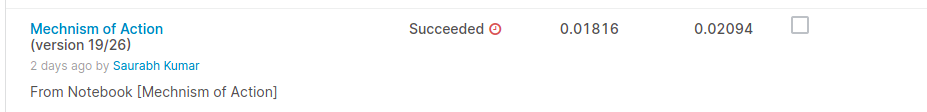

*Naive Bayes*

In [ ]:
from sklearn.naive_bayes import GaussianNB
#using KFold for cross validation
kf = KFold(n_splits=2, shuffle=True, random_state=0)

In [ ]:
best_model = None      #initializing best_model variable for storing best_model
best_loss = 99999999   #initializing best_loss variable to store least log-loss
cv = 1                 #initializing cv variable to store number of cross validation iterating

for train_idx, test_idx in tqdm(kf.split(X, y)):     #iterating for each cv
  X_train , X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  #hyperparameter tuning
  print('FIT')
  param = {'estimator__var_smoothing':[0.000001, 0.00001, 0.0001, 0.1]}
  nb = OneVsRestClassifier(GaussianNB(), n_jobs=-1)
  classifier = GridSearchCV(nb, param,scoring='neg_log_loss', return_train_score='True')
  classifier.fit(X_train, y_train)

  best_param = classifier.best_params_
  print(best_param)

  #training the model
  model = OneVsRestClassifier(GaussianNB(var_smoothing=best_param['estimator__var_smoothing']),n_jobs=-1)
  model.fit(X_train, y_train)

  #predicting target values for validation set and computing log-loss for each target features
  print('PREDICT')
  pred = model.predict_proba(X_val)
  
  val_loss = []    #list to store log-loss of each validation target features
  
  for i in tqdm(range(y_val.shape[1])):    #iterating over each target columns
    loss = log_loss(y_val.iloc[:,i],pred[:,i], labels=[0, 1])    #computing log-loss
    val_loss.append(loss)

  print('Log loss for ',cv,' cv = ',np.mean(val_loss))
  
  #saving best model and least log-loss
  if np.mean(val_loss) < best_loss:
      best_model = model
      best_loss = np.mean(val_loss)
  
  cv += 1    #updating cv variable

FIT
{'estimator__var_smoothing': 0.1}
PREDICT



Log loss for  1  cv =  7.143853539441974
FIT
{'estimator__var_smoothing': 0.1}
PREDICT



Log loss for  2  cv =  7.02059759643026



**Naive bayes score with only step 2**<br>
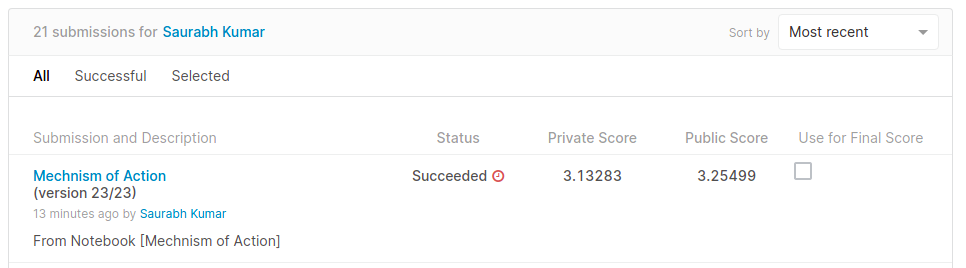

**Naive bayes with two steps**<br>
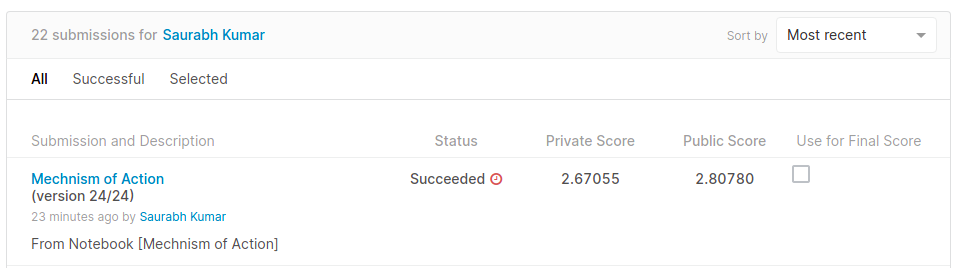

*Random Forest Classifier*

In [ ]:
X_50, y_50, X_n, y_n = train_test_split(X,y, test_size=0.5)    #splitting data 50-50 to train ensemble algorithm
#using KFold for cross validation
kf = KFold(n_splits=2, shuffle=True, random_state=0)

In [ ]:
best_model = None      #initializing best_model variable for storing best_model
best_loss = 99999999   #initializing best_loss variable to store least log-loss
cv = 1                 #initializing cv variable to store number of cross validation iterating

for train_idx, test_idx in tqdm(kf.split(X_50, y_50)):     #iterating for each cv
  X_train , X_val = X.iloc[train_idx], X.iloc[test_idx]
  y_train, y_val = y.iloc[train_idx], y.iloc[test_idx]

  #hyperparameter tuning
  print('FIT')
  param = {'estimator__n_estimators':[50, 100]}
  rf = OneVsRestClassifier(RandomForestClassifier(max_depth=3), n_jobs=-1)
  classifier = GridSearchCV(rf, param,scoring='neg_log_loss', return_train_score='True')
  classifier.fit(X_train, y_train)

  best_param = classifier.best_params_
  print(best_param)

  #training the model
  model = OneVsRestClassifier(RandomForestClassifier(max_depth=3,n_estimators=best_param['estimator__n_estimators']),n_jobs=-1)
  model.fit(X_train, y_train)

  #predicting target values for validation set and computing log-loss for each target features
  print('PREDICT')
  pred = model.predict_proba(X_val)
  
  val_loss = []    #list to store log-loss of each validation target features
  
  for i in tqdm(range(y_val.shape[1])):    #iterating over each target columns
    loss = log_loss(y_val.iloc[:,i],pred[:,i], labels=[0, 1])    #computing log-loss
    val_loss.append(loss)

  print('Log loss for ',cv,' cv = ',np.mean(val_loss))
  
  #saving best model and least log-loss
  if np.mean(val_loss) < best_loss:
      best_model = model
      best_loss = np.mean(val_loss)
  
  cv += 1    #updating cv variable

FIT
{'estimator__n_estimators': 100}
PREDICT



Log loss for  1  cv =  0.020492642887682825
FIT
{'estimator__n_estimators': 100}
PREDICT



Log loss for  2  cv =  0.021002732593529885



**Random Forest Classifier score with only step 2**
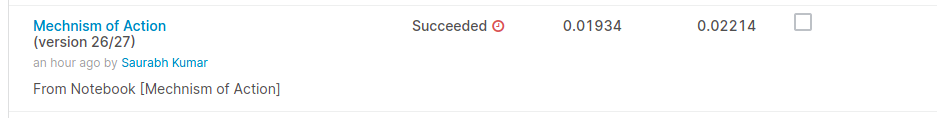

**Out of all these models Logistic Regression is performing best**

In [69]:
#Training Logistic Regression model for step 2
model_2 = OneVsRestClassifier(SGDClassifier(loss='log', alpha=0.001, penalty='l2', max_iter=10000,tol=0.00001, eta0=0.002), n_jobs=-1)
model_2.fit(X,y)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.002, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=10000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l2',
                                            power_t=0.5, random_state=None,
                                            shuffle=True, tol=1e-05,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=-1)

In [70]:
pickle.dump(model_2, open('final_model.pkl','wb'))
model_2 = pickle.load(open('final_model.pkl','rb'))

**Combining step 1 and step 2**

In [ ]:
#predicting target value for test dataset using first model (step 1 model) to find whether MoA is present or not
model_1_pred = model_1.predict(test)

In [ ]:
'''
Getting index value of those data points in which it is predicted that MoA is not present, so that
we can make probabilities of those rows to zero after applying step 2 model.
'''
zero_index = np.where(model_1_pred==0)
len(zero_index[0])

1065

In [74]:
#predicting target values for test dataset
test_pred = model_2.predict_proba(test)

In [72]:
#making probabilities to zero in which it is predicted that MoA is not present
test_pred[zero_index[0]] = 0

NameError: ignored

In [75]:
#saving predicted target values of test dataset in a csv file
sub.iloc[:,1:] = test_pred
sub.to_csv('submission.csv', index=False)

**Kaggle score by using Logistic Regression**<br>
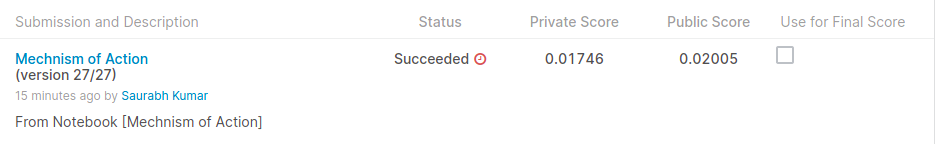

In [76]:
sub.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_0004d9e33,0.000366,0.001299,0.001528,0.016108,0.009998,0.003968,0.000989,0.006858,0.000475,0.043030,0.005954,0.001568,0.000389,0.000797,0.000346,0.000683,0.001015,0.001782,0.014833,0.001140,0.003713,0.002401,0.000201,0.000670,0.000473,0.000288,0.000826,0.000345,0.006827,0.001311,0.000640,0.006920,0.001244,0.000182,0.000095,0.000212,0.008180,0.000564,0.001896,...,0.002689,0.000522,0.002629,0.000963,0.000618,0.003754,0.000193,0.001069,0.000881,0.001622,0.008678,0.009884,0.002321,0.001092,0.000474,0.002523,0.049158,0.001785,0.001982,0.000184,0.000728,0.003148,0.000485,0.000987,0.000962,0.000549,0.000551,0.000510,0.000668,0.001300,0.000622,0.003776,0.003849,0.001844,0.000862,0.000370,0.003171,0.002834,0.011771,0.002414
1,id_001897cda,0.000017,0.000689,0.000433,0.001397,0.002086,0.005395,0.001203,0.005664,0.002528,0.041882,0.007606,0.002932,0.000070,0.007074,0.000379,0.000620,0.001479,0.002192,0.003813,0.002996,0.001385,0.000628,0.000191,0.001037,0.000270,0.000573,0.000361,0.002510,0.000645,0.000822,0.000263,0.001331,0.000975,0.000979,0.000084,0.000574,0.002802,0.000866,0.002039,...,0.001070,0.001280,0.000216,0.000327,0.000501,0.003190,0.000357,0.006121,0.001793,0.001750,0.006006,0.006031,0.000184,0.000263,0.001451,0.001658,0.001880,0.000660,0.014825,0.000295,0.000871,0.002517,0.001312,0.001027,0.000202,0.000357,0.000329,0.001595,0.004967,0.002516,0.000330,0.000927,0.002448,0.000134,0.007867,0.000239,0.006087,0.000612,0.003887,0.002265
2,id_002429b5b,0.000073,0.000113,0.000447,0.002381,0.011240,0.002011,0.000908,0.001076,0.000268,0.008995,0.001897,0.000343,0.000033,0.000366,0.000426,0.001402,0.000344,0.001765,0.000727,0.001271,0.000326,0.002442,0.000076,0.001198,0.000059,0.000137,0.000224,0.000480,0.002230,0.001523,0.000201,0.001922,0.001837,0.000096,0.000041,0.000015,0.000836,0.000128,0.000733,...,0.001947,0.000365,0.000719,0.001268,0.000134,0.000506,0.000329,0.000866,0.000655,0.000129,0.013061,0.007462,0.000859,0.000135,0.000135,0.001663,0.003923,0.000513,0.000827,0.000561,0.000332,0.000939,0.002060,0.000131,0.000524,0.000989,0.000259,0.000619,0.000914,0.000277,0.000320,0.000183,0.001346,0.004043,0.000792,0.000061,0.001106,0.001617,0.003136,0.002337
3,id_0027